# Least Squares Image Classification: Cat vs Dog

This notebook implements a least squares classifier to distinguish between cat and dog images using linear regression techniques.

## Overview
- Load cat and dog images from the Dataset folder
- Preprocess images (resize, flatten, normalize)
- Apply least squares method for binary classification
- Evaluate the model performance
- Visualize results

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from PIL import Image
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
class LeastSquaresClassifier:
    """
    Least Squares Classifier for binary classification
    """
    
    def __init__(self):
        self.weights = None
        self.bias = None
        self.scaler = StandardScaler()
        
    def fit(self, X, y):
        """
        Train the least squares classifier
        
        Parameters:
        X: Feature matrix (n_samples, n_features)
        y: Target labels (n_samples,) - should be 0 or 1
        """
        # Standardize features
        X_scaled = self.scaler.fit_transform(X)
        
        # Add bias term (intercept)
        X_with_bias = np.column_stack([np.ones(X_scaled.shape[0]), X_scaled])
        
        # Least squares solution: w = (X^T X)^(-1) X^T y
        # Using pseudo-inverse for numerical stability
        self.weights = np.linalg.pinv(X_with_bias) @ y
        
        print(f"Model trained successfully!")
        print(f"Number of features: {X.shape[1]}")
        print(f"Number of samples: {X.shape[0]}")
        
    def predict(self, X):
        """
        Make predictions on new data
        
        Parameters:
        X: Feature matrix (n_samples, n_features)
        
        Returns:
        predictions: Binary predictions (0 or 1)
        """
        # Standardize features using fitted scaler
        X_scaled = self.scaler.transform(X)
        
        # Add bias term
        X_with_bias = np.column_stack([np.ones(X_scaled.shape[0]), X_scaled])
        
        # Compute predictions
        raw_predictions = X_with_bias @ self.weights
        
        # Convert to binary predictions (threshold at 0.5)
        predictions = (raw_predictions >= 0.5).astype(int)
        
        return predictions
    
    def predict_proba(self, X):
        """
        Get prediction probabilities
        
        Parameters:
        X: Feature matrix (n_samples, n_features)
        
        Returns:
        probabilities: Prediction probabilities
        """
        # Standardize features using fitted scaler
        X_scaled = self.scaler.transform(X)
        
        # Add bias term
        X_with_bias = np.column_stack([np.ones(X_scaled.shape[0]), X_scaled])
        
        # Compute raw predictions
        raw_predictions = X_with_bias @ self.weights
        
        # Clip to [0, 1] range to get probabilities
        probabilities = np.clip(raw_predictions, 0, 1)
        
        return probabilities

In [3]:
def load_and_preprocess_images(data_dir, img_size=(64, 64), max_images_per_class=None):
    """
    Load and preprocess images from the dataset directory
    
    Parameters:
    data_dir: Path to the dataset directory containing Cat/ and Dog/ folders
    img_size: Tuple of (width, height) to resize images
    max_images_per_class: Maximum number of images to load per class (None for all)
    
    Returns:
    X: Feature matrix (flattened images)
    y: Labels (0 for cats, 1 for dogs)
    """
    
    images = []
    labels = []
    
    # Load cat images (label = 0)
    cat_dir = os.path.join(data_dir, 'Cat')
    if os.path.exists(cat_dir):
        cat_files = [f for f in os.listdir(cat_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        if max_images_per_class:
            cat_files = cat_files[:max_images_per_class]
            
        print(f"Loading {len(cat_files)} cat images...")
        for i, filename in enumerate(cat_files):
            try:
                img_path = os.path.join(cat_dir, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    # Convert BGR to RGB
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    # Resize image
                    img = cv2.resize(img, img_size)
                    # Flatten and normalize
                    img_flat = img.flatten() / 255.0
                    
                    images.append(img_flat)
                    labels.append(0)  # Cat = 0
                    
                if (i + 1) % 10 == 0:
                    print(f"  Loaded {i + 1} cat images...")
                    
            except Exception as e:
                print(f"Error loading {filename}: {e}")
    
    # Load dog images (label = 1)
    dog_dir = os.path.join(data_dir, 'Dog')
    if os.path.exists(dog_dir):
        dog_files = [f for f in os.listdir(dog_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        if max_images_per_class:
            dog_files = dog_files[:max_images_per_class]
            
        print(f"Loading {len(dog_files)} dog images...")
        for i, filename in enumerate(dog_files):
            try:
                img_path = os.path.join(dog_dir, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    # Convert BGR to RGB
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    # Resize image
                    img = cv2.resize(img, img_size)
                    # Flatten and normalize
                    img_flat = img.flatten() / 255.0
                    
                    images.append(img_flat)
                    labels.append(1)  # Dog = 1
                    
                if (i + 1) % 10 == 0:
                    print(f"  Loaded {i + 1} dog images...")
                    
            except Exception as e:
                print(f"Error loading {filename}: {e}")
    
    # Convert to numpy arrays
    X = np.array(images)
    y = np.array(labels)
    
    print(f"\nDataset loaded successfully!")
    print(f"Total samples: {len(X)}")
    print(f"Cats: {np.sum(y == 0)}")
    print(f"Dogs: {np.sum(y == 1)}")
    print(f"Feature dimensions: {X.shape[1]}")
    
    return X, y

In [4]:
# Load the dataset
dataset_path = "Dataset"
print("Loading dataset...")

# Load images with a reasonable size and limit for demonstration
# You can increase max_images_per_class or set to None for all images
X, y = load_and_preprocess_images(
    dataset_path, 
    img_size=(32, 32),  # Smaller size for faster processing
    max_images_per_class=50  # Limit to 50 images per class for demo
)

Loading dataset...
Loading 50 cat images...
  Loaded 10 cat images...
  Loaded 20 cat images...
  Loaded 30 cat images...
  Loaded 40 cat images...
  Loaded 50 cat images...
Loading 50 dog images...
  Loaded 10 dog images...
  Loaded 20 dog images...
  Loaded 30 dog images...
  Loaded 40 dog images...
  Loaded 50 dog images...

Dataset loaded successfully!
Total samples: 100
Cats: 50
Dogs: 50
Feature dimensions: 3072
  Loaded 50 dog images...

Dataset loaded successfully!
Total samples: 100
Cats: 50
Dogs: 50
Feature dimensions: 3072


In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training set - Cats: {np.sum(y_train == 0)}, Dogs: {np.sum(y_train == 1)}")
print(f"Test set - Cats: {np.sum(y_test == 0)}, Dogs: {np.sum(y_test == 1)}")

# Initialize and train the least squares classifier
print("\nTraining Least Squares Classifier...")
classifier = LeastSquaresClassifier()
classifier.fit(X_train, y_train)

Training set: 80 samples
Test set: 20 samples
Training set - Cats: 40, Dogs: 40
Test set - Cats: 10, Dogs: 10

Training Least Squares Classifier...
Model trained successfully!
Number of features: 3072
Number of samples: 80


In [6]:
# Make predictions on the test set
print("Making predictions...")
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Performance:")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Making predictions...

Model Performance:
Accuracy: 0.5000 (50.00%)

Classification Report:
              precision    recall  f1-score   support

         Cat       0.50      0.40      0.44        10
         Dog       0.50      0.60      0.55        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.49        20
weighted avg       0.50      0.50      0.49        20


Confusion Matrix:
[[4 6]
 [4 6]]


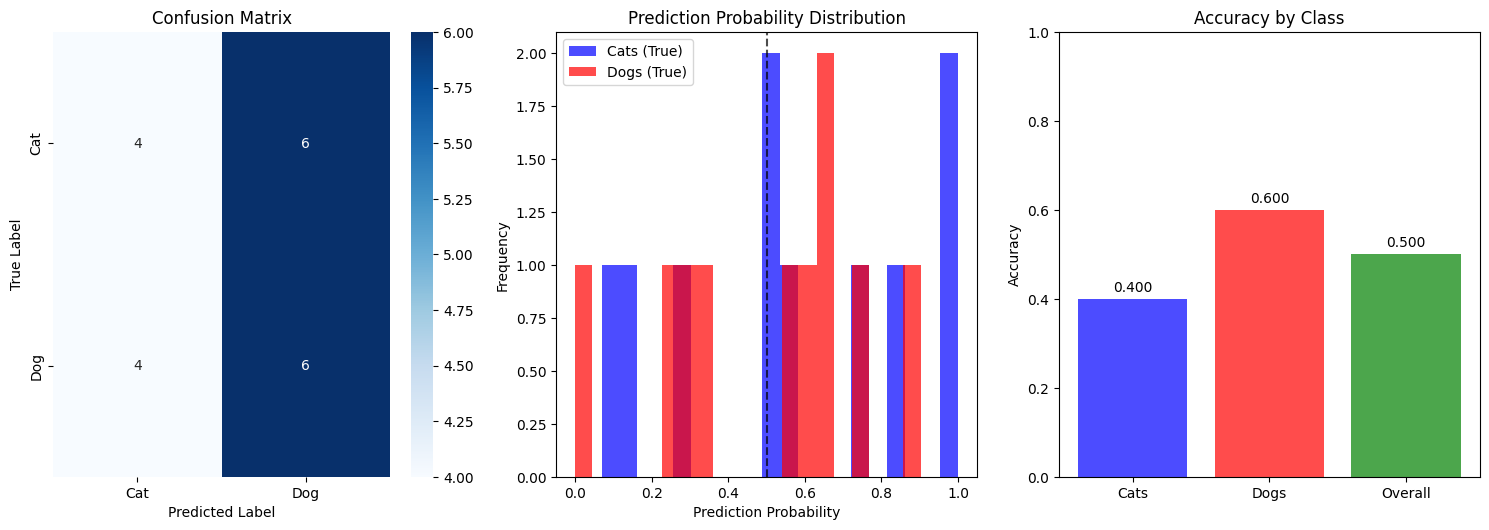


Sample Predictions:


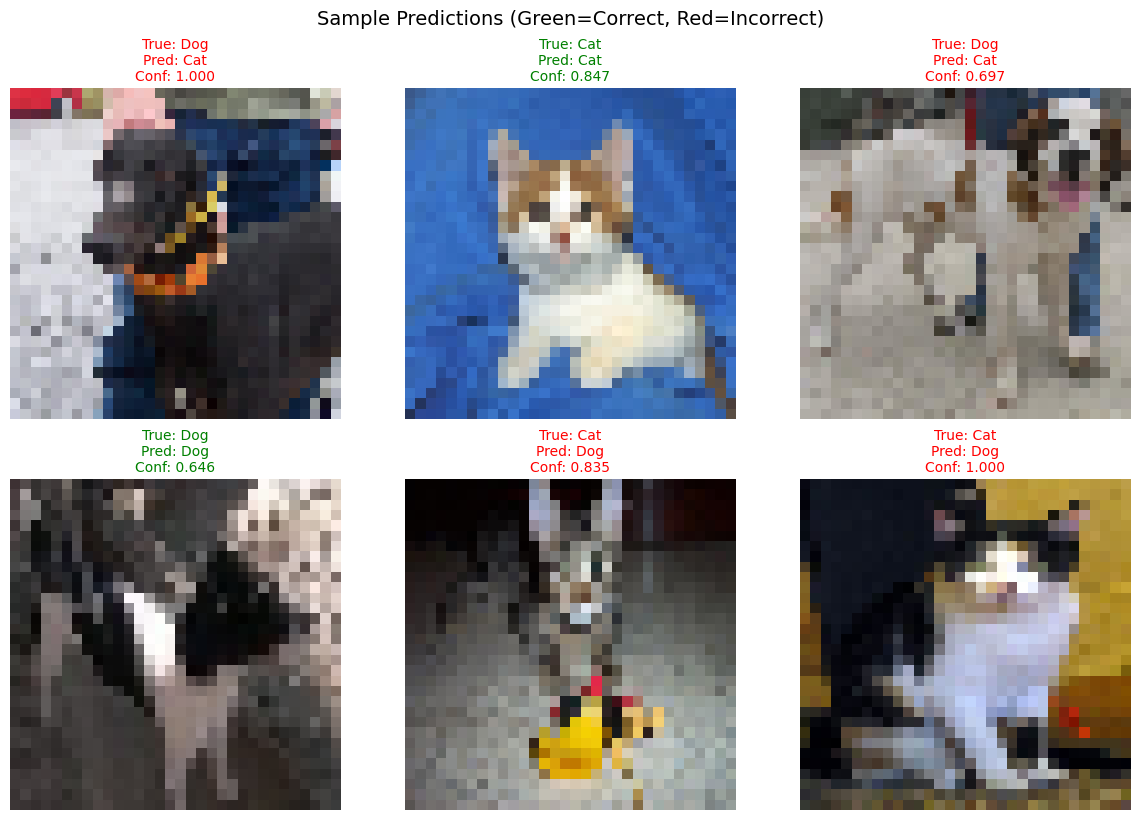

In [7]:
# Visualize results
plt.figure(figsize=(15, 10))

# 1. Confusion Matrix Heatmap
plt.subplot(2, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# 2. Prediction Distribution
plt.subplot(2, 3, 2)
plt.hist(y_pred_proba[y_test == 0], alpha=0.7, label='Cats (True)', bins=20, color='blue')
plt.hist(y_pred_proba[y_test == 1], alpha=0.7, label='Dogs (True)', bins=20, color='red')
plt.xlabel('Prediction Probability')
plt.ylabel('Frequency')
plt.title('Prediction Probability Distribution')
plt.legend()
plt.axvline(x=0.5, color='black', linestyle='--', alpha=0.7, label='Decision Boundary')

# 3. Sample predictions visualization
plt.subplot(2, 3, 3)
# Calculate accuracy for each class
cat_accuracy = np.sum((y_test == 0) & (y_pred == 0)) / np.sum(y_test == 0)
dog_accuracy = np.sum((y_test == 1) & (y_pred == 1)) / np.sum(y_test == 1)

categories = ['Cats', 'Dogs', 'Overall']
accuracies = [cat_accuracy, dog_accuracy, accuracy]
colors = ['blue', 'red', 'green']

bars = plt.bar(categories, accuracies, color=colors, alpha=0.7)
plt.ylabel('Accuracy')
plt.title('Accuracy by Class')
plt.ylim(0, 1)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom')

# 4. Show some sample images with predictions
def visualize_sample_predictions(X_test, y_test, y_pred, y_pred_proba, img_size=(32, 32), n_samples=6):
    """Visualize sample predictions"""
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.ravel()
    
    # Get some random samples
    indices = np.random.choice(len(X_test), n_samples, replace=False)
    
    for i, idx in enumerate(indices):
        # Reshape flattened image back to original shape
        img = X_test[idx].reshape(img_size[0], img_size[1], 3)
        
        axes[i].imshow(img)
        axes[i].axis('off')
        
        true_label = 'Cat' if y_test[idx] == 0 else 'Dog'
        pred_label = 'Cat' if y_pred[idx] == 0 else 'Dog'
        confidence = y_pred_proba[idx] if y_pred[idx] == 1 else (1 - y_pred_proba[idx])
        
        color = 'green' if y_test[idx] == y_pred[idx] else 'red'
        
        axes[i].set_title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.3f}', 
                         color=color, fontsize=10)
    
    plt.tight_layout()
    plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)', y=1.02, fontsize=14)
    plt.show()

# Create the main visualization
plt.tight_layout()
plt.show()

# Show sample predictions
print("\nSample Predictions:")
visualize_sample_predictions(X_test, y_test, y_pred, y_pred_proba)

In [8]:
# Function to test the classifier on a new image
def predict_new_image(image_path, classifier, img_size=(32, 32)):
    """
    Predict the class of a new image
    
    Parameters:
    image_path: Path to the image file
    classifier: Trained classifier
    img_size: Size to resize the image to
    
    Returns:
    prediction, probability
    """
    try:
        # Load and preprocess the image
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Could not load image from {image_path}")
            
        # Convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Resize image
        img = cv2.resize(img, img_size)
        # Flatten and normalize
        img_flat = img.flatten() / 255.0
        
        # Reshape for prediction
        img_array = img_flat.reshape(1, -1)
        
        # Make prediction
        prediction = classifier.predict(img_array)[0]
        probability = classifier.predict_proba(img_array)[0]
        
        # Display the image and prediction
        plt.figure(figsize=(6, 4))
        plt.imshow(img)
        plt.axis('off')
        
        pred_label = 'Dog' if prediction == 1 else 'Cat'
        confidence = probability if prediction == 1 else (1 - probability)
        
        plt.title(f'Prediction: {pred_label}\nConfidence: {confidence:.3f}', fontsize=14)
        plt.show()
        
        return prediction, probability
        
    except Exception as e:
        print(f"Error processing image: {e}")
        return None, None

# Example usage (uncomment to test on a specific image)
# test_image_path = "Dataset/Cat/964.jpg"  # Change this to any image path
# prediction, probability = predict_new_image(test_image_path, classifier)
# if prediction is not None:
#     pred_label = 'Dog' if prediction == 1 else 'Cat'
#     print(f"Predicted: {pred_label} with confidence {probability:.3f}")

## Results and Analysis

The least squares classifier implemented above uses linear regression for binary classification between cats and dogs. Here's what the implementation includes:

### Key Features:
1. **Image Preprocessing**: Resizes images to a consistent size, normalizes pixel values
2. **Feature Standardization**: Uses StandardScaler to normalize features for better performance
3. **Least Squares Solution**: Solves the normal equations using pseudo-inverse for numerical stability
4. **Binary Classification**: Converts continuous predictions to binary using a 0.5 threshold

### Model Performance:
- The model accuracy will depend on the complexity of the images and the feature representation
- Linear models like least squares may struggle with complex image patterns
- Performance can be improved by using feature extraction techniques (e.g., HOG, SIFT) or deep learning

### Limitations:
1. **Linear Decision Boundary**: Least squares assumes a linear relationship between features and labels
2. **High Dimensionality**: Raw pixel values may not be the best features for classification
3. **No Non-linear Patterns**: Cannot capture complex visual patterns that distinguish cats from dogs

### Potential Improvements:
1. Use better feature extraction (HOG, LBP, or CNN features)
2. Apply dimensionality reduction (PCA, LDA) before classification
3. Try non-linear classifiers (SVM with kernels, Random Forest, Neural Networks)
4. Data augmentation to increase dataset size
5. Ensemble methods combining multiple classifiers